In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import itertools
import numpy as np
df = pd.read_csv('http://www.mbnet.com.pl/dl_razem.txt',header=None,sep=' ')


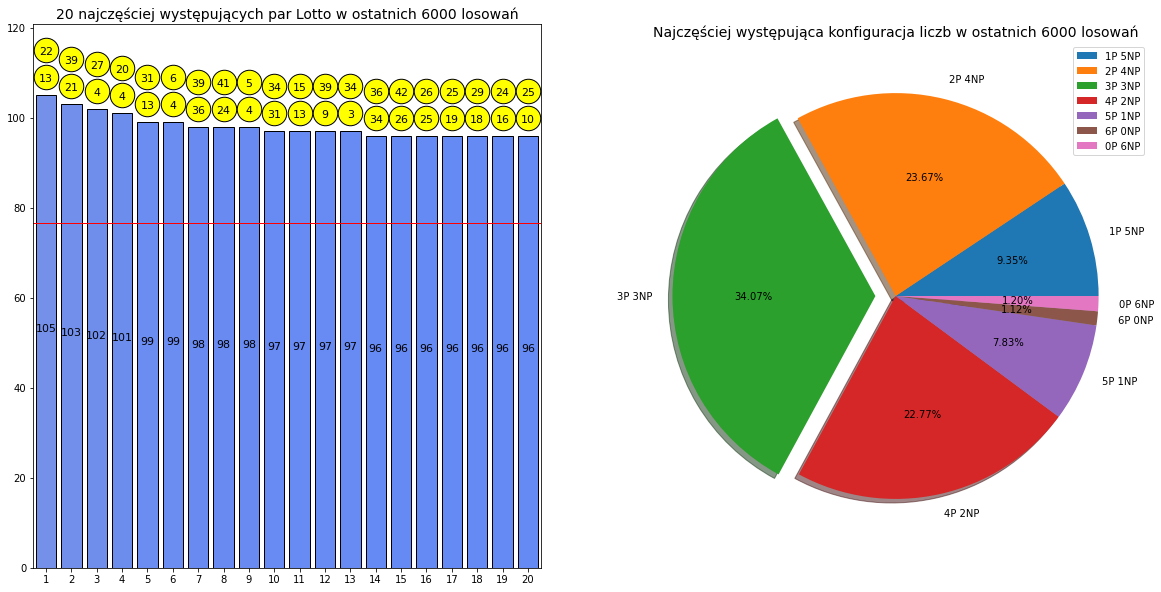

In [2]:
lista=[]


for i in range(6000):
    dlugosc=len(df)
    a=df[2][dlugosc-1-i]
    a=a.split(",")
    a=list(a)
    lista.append(a)
        
lista_liczb = []
for i in range(1,50,1):
    lista_liczb.append(i)

lista_comb = list(itertools.combinations(lista_liczb,2))
licznik=0
lista_ilosci=[]

for i in lista_comb:
    for j in lista:
        if(str(i[0]) in j and str(i[1]) in j):
            licznik=licznik+1
    lista_ilosci.append(licznik)
    licznik=0
    
    
wyniki=[] 
for i in range(len(lista_comb)):
    wyniki.append([lista_comb[i],lista_ilosci[i]])
    
srednia = sum(lista_ilosci)/len(lista_ilosci)
    
wyniki_posortowane=sorted(wyniki,key=lambda x: x[1])
wyniki_20_naj=wyniki_posortowane[-20:]


x=np.linspace(1,20,20)
y=[]

wyniki_20_naj=wyniki_20_naj[::-1]
for i in wyniki_20_naj:
    y.append(i[1])

color=[]
for i in y:
    c=(0.1,90/(i+2*i),90/i,80/(1.25*i))
    color.append(c)

    
fig , axes = plt.subplots(1,2,figsize=(20, 10))
axes[0].bar(x,y,color=color,edgecolor='black')
axes[0].set_xticks(x)
axes[0].set_xlim(0.5,20.5)
axes[0].axhline(srednia,color='red',linewidth=1)
axes[0].set_title("20 najczęściej występujących par Lotto w ostatnich 6000 losowań",size=14)

for i in range(len(y)):
    axes[0].text(x[i],y[i]/2,str(y[i]),color='black',size=11,horizontalalignment='center')
    
for i in range(1,21,1):
    axes[0].scatter(i,y[i-1]+4,s=600,color="yellow",marker="o",edgecolor='black')
    axes[0].scatter(i,y[i-1]+10,s=600,color="yellow",marker="o",edgecolor='black')
    
    
for i in range(1,21,1):
    axes[0].text(i,y[i-1]+3,str(wyniki_20_naj[i-1][0][0]),size=11,color='black',horizontalalignment='center')
    axes[0].text(i,y[i-1]+9,str(wyniki_20_naj[i-1][0][1]),size=11,color='black',horizontalalignment='center')

    
licznik1p=0
licznik2p=0
licznik3p=0
licznik4p=0
licznik5p=0
licznik6p=0
licznik0p=0

for i in lista:
    parzyste=0
    nieparzyste=0
    for j in range(6):
        if(int(i[j])%2==0):
            parzyste+=1
        else:
            nieparzyste+=1
    if(parzyste==1):
        licznik1p+=1
    elif(parzyste==2):
        licznik2p+=1
    elif(parzyste==3):
        licznik3p+=1
    elif(parzyste==4):
        licznik4p+=1
    elif(parzyste==5):
        licznik5p+=1
    elif(parzyste==6):
        licznik6p+=1
    else:
        licznik0p+=1

lista1=[]
lista1.append(licznik1p/60)
lista1.append(licznik2p/60) 
lista1.append(licznik3p/60) 
lista1.append(licznik4p/60) 
lista1.append(licznik5p/60) 
lista1.append(licznik6p/60)
lista1.append(licznik0p/60)
lista2=["1P 5NP","2P 4NP","3P 3NP","4P 2NP","5P 1NP","6P 0NP","0P 6NP"]

indeks=lista1.index(max(lista1))

explode=[]
for i in range(7):
    if(i!=indeks):
        explode.append(0)
    else:
        explode.append(0.1)
        
axes[1].pie(lista1,explode=explode,labels=lista2,autopct='%1.2f%%',shadow=True,frame=False)
axes[1].set_title("Najczęściej występująca konfiguracja liczb w ostatnich 6000 losowań",size=14)
plt.legend()

plt.savefig("06_str_277094.pdf")